# Glico Game

In this notebook, we'll analyze each player's behavior when he is playing Glico game.

### What is Glico game?

In Glico game, two players compete to reach the top of N stairs first.  
How many stairs players can go up is decided by playing Rock Paper Scissors at every turn.  
Specifically,  
- If one player wins with rock, he can go up 3 stairs, but the other stays.
- If one player wins with paper or scissors, he can go up 6 stairs, but the other stays.
- If it ended in a draw, both players stay.

*** image of Glico game ***


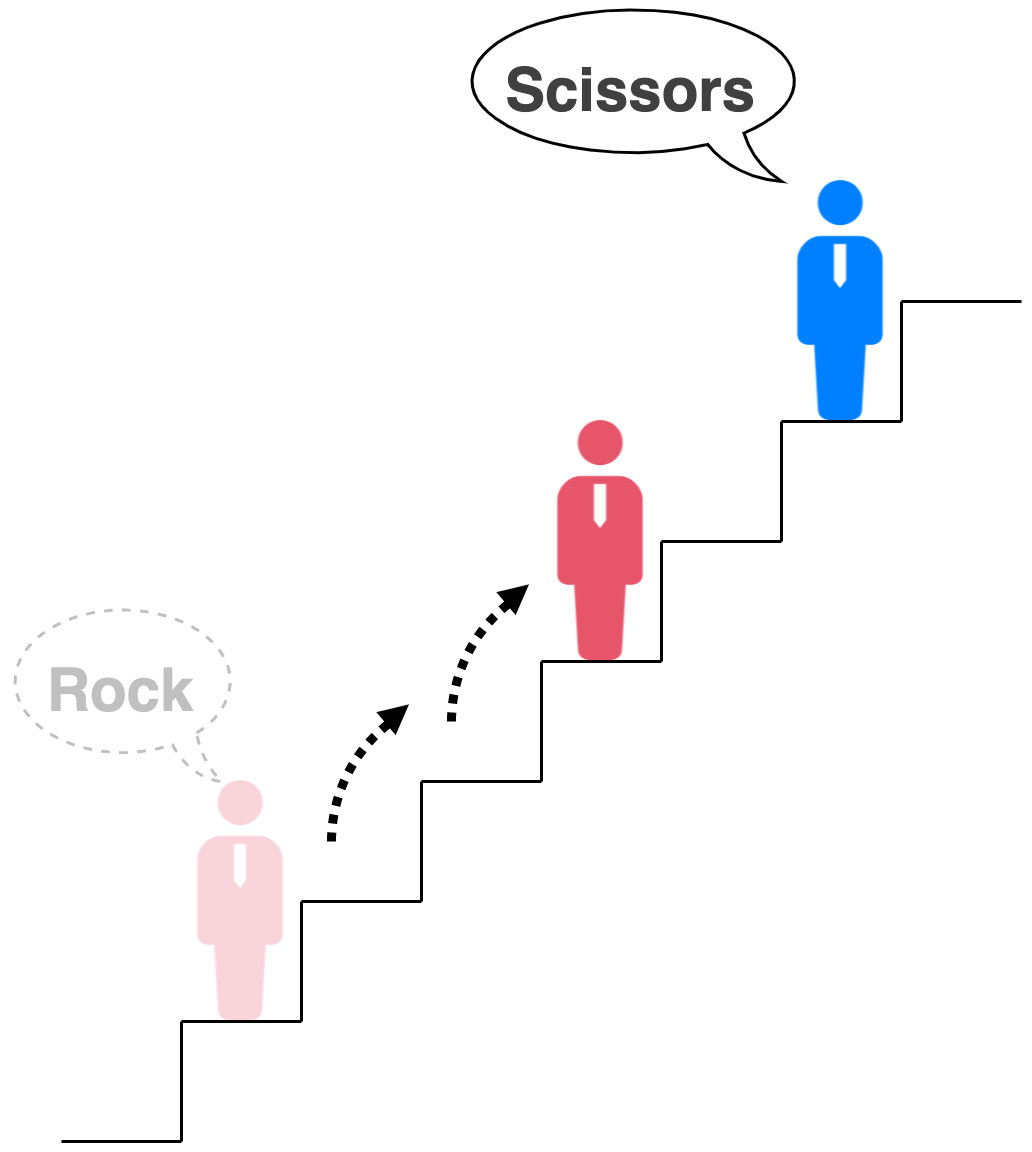

In [1]:
from IPython.display import Image

print('*** image of Glico game ***')
Image(filename='glico_game.png', width=192, height=192)

Naively, we'll create a payoff matrix as follows.

| | Rock | Paper | Scissors |
| ---- | ---- | ---- | ---- |
| **Rock** | $$0$$ | $$-6$$ | $$3$$ |
| **Paper** | $$6$$ | $$0$$ | $$-6$$ |
| **Scissors** | $$-3$$ | $$6$$ | $$0$$ |

(The payoff that the opponent player gains is omitted because of symmetry property.)

Let's solve for mixed-strategy Nash equilibrium.

In [ ]:
# import necessary packages
from pprint import pprint

import numpy as np
import pandas as pd

In [ ]:
# payoff matrix
A = np.array([
    [0, -6, 3],
    [6, 0, -6],
    [-3, 6, 0]
])
print('*** payoff matrix ***')
moves = ['Rock', 'Paper', 'Scissors']
pprint(pd.DataFrame(A, index=moves, columns=moves))

### How to solve for a mixed strategy

We represent two players as i and j, respectively.  
Let j's strategy be as
$$s_{j} = (q_{rock}, q_{paper}, q_{scissors}),~~~~\sum_{k \in \{rock, paper, scissors\}}q_{k}=1$$
The expected payoff of i is
$$E[u_{i-rock}] = -6q_{paper} + 3q_{scissors}$$
$$E[u_{i-paper}] = 6q_{rock} - 6q_{scissors}$$
$$E[u_{i-scissors}] = -3q_{rock} + 6q_{paper}$$
In Nash equilibrium, the following equations hold.
$$-6q_{paper} + 3q_{scissors} = 6q_{rock} - 6q_{scissors} = -3q_{rock} + 6q_{paper}$$
This is equivalent to
$$3q_{rock} - 12q_{paper} + 3q_{scissors} = 0$$
$$9q_{rock} - 6q_{paper} - 6q_{scissors} = 0$$ 
To organize the above, we just solve the following simultaneous equations.

$$
\begin{pmatrix}
3 & -12 & 3 \\
9 & -6 & -6 \\
1 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
q_{rock} \\
q_{paper} \\
q_{scissors}
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}
$$

In [ ]:
B = np.concatenate((A[:-1] - A[-1], np.array([[1, 1, 1]])), axis=0)
print('*** coefficient matrix ***')
pprint(B)
q_rock, q_paper, q_scissors = np.matmul(np.linalg.inv(B), np.array([0, 0, 1]))
print(f'The equilibrium strategy is (q_rock, q_paper, q_scissors) = ({q_rock}, {q_paper}, {q_scissors})')

In this case, the payoff matrix is symmetric, so the same is true of i.  
As a result, we may conclude that mixed-strategy Nash equilibrium is $$(s^{*}_{i}, s^{*}_{j}) = ((0.4, 0.2, 0.4),(0.4, 0.2, 0.4))$$

### Is this correct?
However, it is incorrect.  
First of all, the true payoff is win/lose, not the number of stairs.  
(If the goal of this game is to go up higher, the above payoff matrix is correct.)  
Changing the viewpoint, if both players stay at 1 ~ 3 stairs away from the top, they will win the game with any hand.  
In such a case, the payoff matrix is the same as just playing Rock Paper Scissors.

| | Rock | Paper | Scissors |
| ---- | ---- | ---- | ---- |
| **Rock** | $$0$$ | $$-1$$ | $$1$$ |
| **Paper** | $$1$$ | $$0$$ | $$-1$$ |
| **Scissors** | $$-1$$ | $$1$$ | $$0$$ |

### (Appendix) Solution

Consider the expect payoff $E_{n,m}$ when one and the other players stay at n and m stairs away from the top.  
Clearly, $E_{n,m} = 1~(n \leqq 0, m > 0)$ and $E_{n,m} = -1~(n > 0, m \leqq 0)$.

The payoff matrix should be like the following.   

| | Rock | Paper | Scissors |
| ---- | ---- | ---- | ---- |
| **Rock** | $$E_{n, m}$$ | $$E_{n, m-6}$$ | $$E_{n-3, m}$$ |
| **Paper** | $$E_{n-6, m}$$ | $$E_{n, m}$$ | $$E_{n, m-6}$$ |
| **Scissors** | $$E_{n, m-3}$$ | $$E_{n-6, m}$$ | $$E_{n, m}$$ |

In Nash equilibrium,

$$E_{n, m}[u_{i-rock}] = E_{n, m}[u_{i-paper}] = E_{n, m}[u_{i-scissors}] = E_{n, m}$$

That is

$$q_{rock}E_{n, m} + q_{paper}E_{n, m-6} + q_{scissors}E_{n - 3, m} = E_{n, m}$$
$$q_{rock}E_{n-6, m} + q_{paper}E_{n, m} + q_{scissors}E_{n, m - 6} = E_{n, m}$$
$$q_{rock}E_{n, m - 3} + q_{paper}E_{n - 6, m} + q_{scissors}E_{n, m} = E_{n, m}$$  
$$subject~to~q_{rock} + q_{paper} + q_{scissors} = 1$$

Now we can inductively calculate $E_{n, m}$.  

### n = \{1,2,3\}, m = \{1,2,3\}

Regarding $E_{1, 1}$, the following equations hold.  
$$q_{rock}E_{1, 1} + q_{paper}E_{1, -5} + q_{scissors}E_{-2, 1} = E_{1, 1}$$
$$q_{rock}E_{-5, 1} + q_{paper}E_{1, 1} + q_{scissors}E_{1, -5} = E_{1, 1}$$
$$q_{rock}E_{1, -2} + q_{paper}E_{-5, 1} + q_{scissors}E_{1, 1} = E_{1, 1}$$
Since $E_{n,m} = 1~(n \leqq 0, m > 0)$ and $E_{n,m} = -1~(n > 0, m \leqq 0)$, these are equivalent to
$$E_{1, 1} = \frac{- q_{paper} + q_{scissors}}{1 - q_{rock}} = \frac{q_{rock} - q_{scissors}}{1 - q_{paper}} = \frac{- q_{rock} + q_{paper}}{1 - q_{scissors}} $$
From the equation, we obtain
$$q_{rock} = q_{paper} = q_{scissors} = \frac{1}{3}, E_{1,1}=0$$
The same is true in the cases of (n, m) = (1, 2), ... (3, 2), and (3, 3).

### n = \{4,5,6\}, m = \{1,2,3\}

As for $E_{4, 1}$, 
$$q_{rock}E_{4, 1} + q_{paper}E_{4, -5} + q_{scissors}E_{1, 1} = E_{4, 1}$$
$$q_{rock}E_{-2, 1} + q_{paper}E_{4, 1} + q_{scissors}E_{4, -5} = E_{4, 1}$$
$$q_{rock}E_{4, -2} + q_{paper}E_{-2, 1} + q_{scissors}E_{4, 1} = E_{4, 1}$$
These are equivalent to
$$E_{4, 1} = \frac{- q_{paper}}{1 - q_{rock}} = \frac{q_{rock} - q_{scissors}}{1 - q_{paper}} = \frac{- q_{rock} + q_{paper}}{1 - q_{scissors}}$$
Clearly, $E_{4, 1} = \frac{- q_{paper}}{1 - q_{rock}} < 0$, so we can see being distant from the top is not profitable.  
From the equation, we obtain
$$q_{rock} \sim 0.30438, q_{paper} \sim 0.17951, q_{scissors} \sim 0.51611, E_{4,1} \sim -0.25806$$
(using Wolfram)  
The same is true in the cases of (n, m) = (4, 2), ... (6, 2), and (6, 3).

### n = \{4,5,6\}, m = \{4,5,6\}

As for $E_{4, 4}$, 
$$q_{rock}E_{4, 4} + q_{paper}E_{4, -2} + q_{scissors}E_{1, 4} = E_{4, 4}$$
$$q_{rock}E_{-2, 4} + q_{paper}E_{4, 4} + q_{scissors}E_{4, -2} = E_{4, 4}$$
$$q_{rock}E_{4, 1} + q_{paper}E_{-2, 4} + q_{scissors}E_{4, 4} = E_{4, 4}$$
The equations above are equivalent to
$$E_{4, 4} = \frac{- q_{paper} - q_{scissors}E_{4, 1}}{1 - q_{rock}} = \frac{q_{rock} - q_{scissors}}{1 - q_{paper}} = \frac{q_{rock}E_{4, 1} + q_{paper}}{1 - q_{scissors}}$$
From the equation, we obtain
$$q_{rock} \sim 0.44286, q_{paper} \sim 0.11428, q_{scissors} \sim 0.44286, E_{4,4} = 0$$
(using Wolfram)  
The same is true in the cases of (n, m) = (4, 5), ... (6, 5), and (6, 6).